In [39]:
# Import dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import os
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sqlalchemy import create_engine
from sqlalchemy import inspect
from config import password 

In [41]:
# set parameters for database connection
# %reload_ext sql
# connect to aws database
host = "creditreport.cvvccrp8oiue.us-east-2.rds.amazonaws.com"
database = "postgres"
user = 'postgres' #os.getenv('PROJECT_USER')

In [43]:
# make connection
connection_string = f"postgresql://{user}:{password}@{host}/{database}"
engine = create_engine(connection_string)
insp = inspect(engine)
insp.get_table_names()

/Users/neeshma_sweetie/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


['loan',
 'project_train',
 'project_test',
 'credit_info',
 'customers',
 'account',
 'income_liabilities']

In [44]:
#  Import and read the train.csv.
credit_df = credit_df = pd.read_sql('SELECT * from project_train', engine)

# sql alchemy to pull from project_test

credit_df.head(10)

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,...,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,5634,3392,1,Aaron Maashoh,23,821000265.0,Scientist,19114.12,1824.843333,3,...,Good,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23,821000265.0,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.944960,266.0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629163,Good
2,5636,3392,3,Aaron Maashoh,23,821000265.0,Scientist,19114.12,1824.843333,3,...,Good,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23,821000265.0,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23,821000265.0,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
5,5639,3392,6,Aaron Maashoh,23,821000265.0,Scientist,19114.12,1824.843333,3,...,Good,809.98,27.262259,270.0,No,49.574949,62.430172,Low_spent_Small_value_payments,340.479212,Good
6,5640,3392,7,Aaron Maashoh,23,821000265.0,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,271.0,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good
7,5641,3392,8,Aaron Maashoh,23,821000265.0,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,271.0,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,Standard
8,5646,8625,1,Rick Rothackerj,28,4075839.0,Teacher,34847.84,3037.986667,2,...,Good,605.03,24.464031,319.0,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,Standard
9,5647,8625,2,Rick Rothackerj,28,4075839.0,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,320.0,No,18.816215,40.391238,High_spent_Large_value_payments,484.591214,Good


In [46]:
# Drop the non-beneficial ID columns and nulls
credit_df = credit_df.drop(["id","customer_id", "name", "ssn"],1)
credit_df = credit_df.dropna()
credit_df.head()

/Users/neeshma_sweetie/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,month,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,type_of_loan,...,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,1,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,2,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.944960,266.0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629163,Good
3,4,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,5,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
5,6,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,27.262259,270.0,No,49.574949,62.430172,Low_spent_Small_value_payments,340.479212,Good


In [47]:
# check correlations
credit_df.corr()

,month,age,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,total_emi_per_month,amount_invested_monthly,monthly_balance
month,1.000000,0.017167,-0.000313,-0.002137,-0.000173,-0.000990,-0.000379,-0.000042,-0.000150,-0.000474,-0.000777,0.139616,-0.000003,0.002241,0.022695,0.049476,0.000561,-0.000704
age,0.017167,1.000000,0.092008,0.091026,-0.190005,-0.148953,-0.217328,-0.213661,-0.174352,-0.184284,-0.157005,-0.251301,-0.202669,0.025315,0.235221,-0.047421,0.039160,-0.001703
annual_income,-0.000313,0.092008,1.000000,0.998186,-0.283562,-0.217328,-0.301937,-0.255142,-0.250093,-0.285554,-0.175536,-0.280403,-0.268609,0.175277,0.272533,0.439152,0.437649,-0.000689
monthly_inhand_salary,-0.002137,0.091026,0.998186,1.000000,-0.282721,-0.216438,-0.301449,-0.253934,-0.249492,-0.284631,-0.175476,-0.279980,-0.268352,0.175388,0.271623,0.423527,0.439072,-0.000878
num_bank_accounts,-0.000173,-0.190005,-0.283562,-0.282721,1.000000,0.443115,0.584614,0.472462,0.561231,0.601336,0.331186,0.519589,0.507356,-0.070871,-0.485813,0.051088,-0.129170,0.005060
num_credit_card,-0.000990,-0.148953,-0.217328,-0.216438,0.443115,1.000000,0.497714,0.417423,0.480044,0.423116,0.253260,0.459322,0.489945,-0.053983,-0.417414,0.059650,-0.101256,0.001442
interest_rate,-0.000379,-0.217328,-0.301937,-0.301449,0.584614,0.497714,1.000000,0.559046,0.589336,0.571286,0.366958,0.633336,0.629422,-0.074847,-0.576430,0.072417,-0.143275,0.003753
num_of_loan,-0.000042,-0.213661,-0.255142,-0.253934,0.472462,0.417423,0.559046,1.000000,0.501310,0.474167,0.369908,0.565138,0.638587,-0.099651,-0.605723,0.329380,-0.123792,0.001226
delay_from_due_date,-0.000150,-0.174352,-0.250093,-0.249492,0.561231,0.480044,0.589336,0.501310,1.000000,0.542097,0.293937,0.540674,0.571956,-0.062677,-0.491814,0.079434,-0.117348,0.004493
num_of_delayed_payment,-0.000474,-0.184284,-0.285554,-0.284631,0.601336,0.423116,0.571286,0.474167,0.542097,1.000000,0.325641,0.499888,0.504055,-0.073152,-0.482127,0.054553,-0.123596,0.005554


In [48]:
# Create a new feature by dividing the Outstanding_Debt column by the Annual_Income column
credit_df['OutstandingDebt_AnnualIncome'] = credit_df['outstanding_debt']/credit_df['annual_income']

In [49]:
# check the train df dtypes
credit_df.dtypes

month                             int64
age                               int64
occupation                       object
annual_income                   float64
monthly_inhand_salary           float64
num_bank_accounts                 int64
num_credit_card                   int64
interest_rate                     int64
num_of_loan                       int64
type_of_loan                     object
delay_from_due_date               int64
num_of_delayed_payment          float64
changed_credit_limit            float64
num_credit_inquiries            float64
credit_mix                       object
outstanding_debt                float64
credit_utilization_ratio        float64
credit_history_age              float64
payment_of_min_amount            object
total_emi_per_month             float64
amount_invested_monthly         float64
payment_behaviour                object
monthly_balance                 float64
credit_score                     object
OutstandingDebt_AnnualIncome    float64


In [50]:
# train_df number of unique entries per variable
credit_df.nunique()

month                               8
age                                43
occupation                         15
annual_income                   12488
monthly_inhand_salary           13231
num_bank_accounts                  12
num_credit_card                    12
interest_rate                      34
num_of_loan                        10
type_of_loan                     6261
delay_from_due_date                68
num_of_delayed_payment             31
changed_credit_limit             3634
num_credit_inquiries               18
credit_mix                          3
outstanding_debt                12203
credit_utilization_ratio        97907
credit_history_age                404
payment_of_min_amount               3
total_emi_per_month             11886
amount_invested_monthly         82608
payment_behaviour                   6
monthly_balance                 96035
credit_score                        3
OutstandingDebt_AnnualIncome    12500
dtype: int64

In [52]:
# Look at ocupation value counts
credit_df.occupation.value_counts()

Lawyer           6938
Engineer         6708
Architect        6699
Mechanic         6637
Scientist        6608
Accountant       6600
Developer        6591
Media_Manager    6580
Teacher          6532
Entrepreneur     6501
Doctor           6431
Journalist       6394
Manager          6289
Musician         6226
Writer           6175
Name: occupation, dtype: int64

<AxesSubplot:ylabel='Density'>

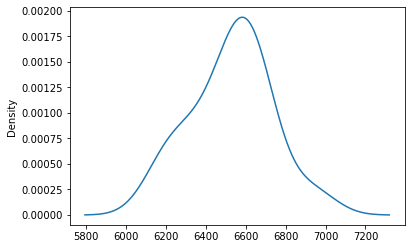

In [53]:
# Visualize the value counts of Occupation
occupation_counts = credit_df.occupation.value_counts()
occupation_counts.plot.density()

In [54]:
# Look at type of loan value counts
credit_df.type_of_loan.value_counts().to_frame().head(12)

,type_of_loan
No Data,11149
Not Specified,1369
Credit-Builder Loan,1258
Debt Consolidation Loan,1244
Personal Loan,1244
Student Loan,1202
Payday Loan,1175
Mortgage Loan,1149
Auto Loan,1123
Home Equity Loan,1114


<AxesSubplot:ylabel='Density'>

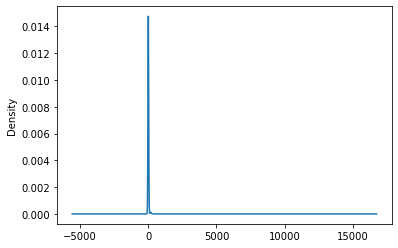

In [55]:
# Visualize the value counts of type of loan
loan_type_counts = credit_df.type_of_loan.value_counts()
loan_type_counts.plot.density()

In [56]:
# Bin lower density variables
replace_loan_type = list(loan_type_counts[loan_type_counts < 350].index)

# Replace in DF
for loan in replace_loan_type:
    credit_df.type_of_loan = credit_df.type_of_loan.replace(loan, 'Other')

# Check binning
credit_df.type_of_loan.value_counts()

Other                      75882
No Data                    11149
Not Specified               1369
Credit-Builder Loan         1258
Debt Consolidation Loan     1244
Personal Loan               1244
Student Loan                1202
Payday Loan                 1175
Mortgage Loan               1149
Auto Loan                   1123
Home Equity Loan            1114
Name: type_of_loan, dtype: int64

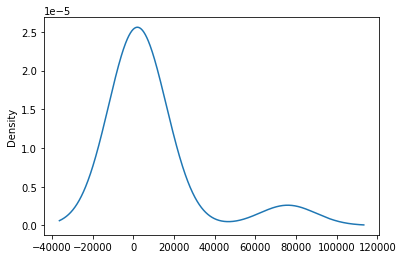

In [77]:
credit_df.type_of_loan.value_counts().plot.density()

In [57]:
# Drop Type_of_Loans column 
credit_df = credit_df.drop('type_of_loan',axis=1)

In [58]:
# Create a copy of the df before encoding (to use later for the binary classidication)
credit_df_copy = credit_df.copy()
credit_df_copy.head()

,month,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,...,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score,OutstandingDebt_AnnualIncome
0,1,23,Scientist,19114.12,1824.843333,3,4,3,4,3,...,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good,0.042376
1,2,23,Scientist,19114.12,1824.843333,3,4,3,4,-1,...,809.98,31.944960,266.0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629163,Good,0.042376
3,4,23,Scientist,19114.12,1824.843333,3,4,3,4,5,...,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,0.042376
4,5,23,Scientist,19114.12,1824.843333,3,4,3,4,6,...,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,0.042376
5,6,23,Scientist,19114.12,1824.843333,3,4,3,4,8,...,809.98,27.262259,270.0,No,49.574949,62.430172,Low_spent_Small_value_payments,340.479212,Good,0.042376


In [59]:
# create a copy for lgbm with credit score encoded in one column
credit_df_lgbm = credit_df.copy()
credit_df_lgbm.credit_score = credit_df_lgbm.credit_score.replace('Poor', '0')
credit_df_lgbm.credit_score = credit_df_lgbm.credit_score.replace('Standard', '1')
credit_df_lgbm.credit_score = credit_df_lgbm.credit_score.replace('Good', '2')
credit_df_lgbm.credit_score 

0        2
1        2
3        2
4        2
5        2
        ..
99995    0
99996    0
99997    0
99998    1
99999    0
Name: credit_score, Length: 97909, dtype: object

In [60]:
# Generate our categorical variable lists
credit_cat = credit_df.dtypes[credit_df.dtypes == "object"].index.tolist()
credit_cat

['occupation',
 'credit_mix',
 'payment_of_min_amount',
 'payment_behaviour',
 'credit_score']

In [61]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(credit_df[credit_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(credit_cat)
encode_df.head()

,occupation_Accountant,occupation_Architect,occupation_Developer,occupation_Doctor,occupation_Engineer,occupation_Entrepreneur,occupation_Journalist,occupation_Lawyer,occupation_Manager,occupation_Mechanic,...,payment_of_min_amount_Yes,payment_behaviour_High_spent_Large_value_payments,payment_behaviour_High_spent_Medium_value_payments,payment_behaviour_High_spent_Small_value_payments,payment_behaviour_Low_spent_Large_value_payments,payment_behaviour_Low_spent_Medium_value_payments,payment_behaviour_Low_spent_Small_value_payments,credit_score_Good,credit_score_Poor,credit_score_Standard
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [62]:
# merge encoded features and drop originals
credit_df = credit_df.merge(encode_df, left_index=True, right_index=True)
credit_df = credit_df.drop(credit_cat, 1)
credit_df.head()

/Users/neeshma_sweetie/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,month,age,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,...,payment_of_min_amount_Yes,payment_behaviour_High_spent_Large_value_payments,payment_behaviour_High_spent_Medium_value_payments,payment_behaviour_High_spent_Small_value_payments,payment_behaviour_Low_spent_Large_value_payments,payment_behaviour_Low_spent_Medium_value_payments,payment_behaviour_Low_spent_Small_value_payments,credit_score_Good,credit_score_Poor,credit_score_Standard
0,1,23,19114.12,1824.843333,3,4,3,4,3,7.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,23,19114.12,1824.843333,3,4,3,4,-1,4.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,4,23,19114.12,1824.843333,3,4,3,4,5,4.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,23,19114.12,1824.843333,3,4,3,4,6,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
5,6,23,19114.12,1824.843333,3,4,3,4,8,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [64]:
# split preprocessed data into features and target
y = credit_df[['credit_score_Good', 'credit_score_Poor','credit_score_Standard']]
X = credit_df.drop(columns=['credit_score_Good', 'credit_score_Poor','credit_score_Standard'])

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [65]:
# create a StandardScaler instances
scaler = StandardScaler()

# fit the StandardScaler
X_scaler = scaler.fit(X_train)

# scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [86]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest predictive accuracy: 0.694


In [25]:
len(X_train_scaled[0])

46

In [26]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 100
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 15


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=3, activation="softmax"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4700      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 15)                765       
                                                                 
 dense_3 (Dense)             (None, 3)                 48        
                                                                 
Total params: 10,563
Trainable params: 10,563
Non-trainable params: 0
_________________________________________________________________


In [27]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints_categorical/",exist_ok=True)
checkpoint_path = "checkpoints_categorical/weights.{epoch:02d}.hdf5"

# Compile the model
nn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch')

In [28]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=75)

Epoch 1/75
2247/2247 [==============================] - 6s 2ms/step - loss: 0.8137 - accuracy: 0.6175
Epoch 2/75
2247/2247 [==============================] - 5s 2ms/step - loss: 0.7991 - accuracy: 0.6245
Epoch 3/75
2247/2247 [==============================] - 5s 2ms/step - loss: 0.7949 - accuracy: 0.6249
Epoch 4/75
2247/2247 [==============================] - 5s 2ms/step - loss: 0.7897 - accuracy: 0.6273
Epoch 5/75
2247/2247 [==============================] - 5s 2ms/step - loss: 0.7833 - accuracy: 0.6291
Epoch 6/75
2247/2247 [==============================] - 5s 2ms/step - loss: 0.7768 - accuracy: 0.6311
Epoch 7/75
2247/2247 [==============================] - 6s 3ms/step - loss: 0.7692 - accuracy: 0.6336
Epoch 8/75
2247/2247 [==============================] - 5s 2ms/step - loss: 0.7619 - accuracy: 0.6386
Epoch 9/75
2247/2247 [==============================] - 5s 2ms/step - loss: 0.7547 - accuracy: 0.6423
Epoch 10/75
2247/2247 [==============================] - 5s 2ms/step - loss: 0.747

In [29]:
# Evaluate the model using the test data (ReLU)
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

749/749 - 1s - loss: 0.8235 - accuracy: 0.6428 - 1s/epoch - 1ms/step
Loss: 0.8234507441520691, Accuracy: 0.6427975296974182


In [30]:
# Export our model to HDF5 file
nn.save("trained_categorical_credit_score.h5")

Trying the Same Model with 2 Outputs Instead of 3
- will create more trainable data compared to # of outputs
- will possibly lose information (users may want the differentiation of good vs standard)

In [67]:
#combine the Good and Standard output
credit_df_copy.Credit_Score = credit_df_copy.credit_score.replace('Standard', 'Good')

/Users/neeshma_sweetie/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [69]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df2 = pd.DataFrame(enc.fit_transform(credit_df_copy[credit_cat]))

# Add the encoded variable names to the dataframe
encode_df2.columns = enc.get_feature_names_out(credit_cat)

# Drop the credit_score_poor column
encode_df2 = encode_df2.drop(columns=['credit_score_Poor'])
encode_df2.head()

,occupation_Accountant,occupation_Architect,occupation_Developer,occupation_Doctor,occupation_Engineer,occupation_Entrepreneur,occupation_Journalist,occupation_Lawyer,occupation_Manager,occupation_Mechanic,...,payment_of_min_amount_No,payment_of_min_amount_Yes,payment_behaviour_High_spent_Large_value_payments,payment_behaviour_High_spent_Medium_value_payments,payment_behaviour_High_spent_Small_value_payments,payment_behaviour_Low_spent_Large_value_payments,payment_behaviour_Low_spent_Medium_value_payments,payment_behaviour_Low_spent_Small_value_payments,credit_score_Good,credit_score_Standard
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [70]:
# merge encoded features and drop originals
credit_df_copy = credit_df_copy.merge(encode_df2, left_index=True, right_index=True)
credit_df_copy = credit_df_copy.drop(credit_cat, 1)
credit_df_copy.head()

/Users/neeshma_sweetie/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,month,age,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,...,payment_of_min_amount_No,payment_of_min_amount_Yes,payment_behaviour_High_spent_Large_value_payments,payment_behaviour_High_spent_Medium_value_payments,payment_behaviour_High_spent_Small_value_payments,payment_behaviour_Low_spent_Large_value_payments,payment_behaviour_Low_spent_Medium_value_payments,payment_behaviour_Low_spent_Small_value_payments,credit_score_Good,credit_score_Standard
0,1,23,19114.12,1824.843333,3,4,3,4,3,7.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2,23,19114.12,1824.843333,3,4,3,4,-1,4.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,4,23,19114.12,1824.843333,3,4,3,4,5,4.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5,23,19114.12,1824.843333,3,4,3,4,6,4.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
5,6,23,19114.12,1824.843333,3,4,3,4,8,4.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [71]:
# split preprocessed data into features and target
y2 = credit_df_copy[['credit_score_Good']]
X2 = credit_df_copy.drop(columns=['credit_score_Good'])

# split into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, stratify=y2)

In [72]:
# create a StandardScaler instances
scaler = StandardScaler()

# fit the StandardScaler
X_scaler = scaler.fit(X_train2)

# scale the data
X_train_scaled2 = X_scaler.transform(X_train2)
X_test_scaled2 = X_scaler.transform(X_test2)

In [36]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled2, y_train2)

# Evaluate the model
y_pred2 = rf_model.predict(X_test_scaled2)
print(f" Random forest predictive accuracy: {accuracy_score(y_test2,y_pred2):.3f}")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


 Random forest predictive accuracy: 0.824


In [37]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled2[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 15


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 80)                3760      
                                                                 
 dense_5 (Dense)             (None, 50)                4050      
                                                                 
 dense_6 (Dense)             (None, 15)                765       
                                                                 
 dense_7 (Dense)             (None, 1)                 16        
                                                                 
Total params: 8,591
Trainable params: 8,591
Non-trainable params: 0
_________________________________________________________________


In [38]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints_binary/",exist_ok=True)
checkpoint_path = "checkpoints_binary/weights.{epoch:02d}.hdf5"

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch')

In [39]:
# Train the model
fit_model = nn.fit(X_train_scaled2, y_train2, epochs=100)

Epoch 1/100
2247/2247 [==============================] - 5s 2ms/step - loss: 0.5254 - accuracy: 0.7544
Epoch 2/100
2247/2247 [==============================] - 5s 2ms/step - loss: 0.5155 - accuracy: 0.7585
Epoch 3/100
2247/2247 [==============================] - 5s 2ms/step - loss: 0.5113 - accuracy: 0.7591
Epoch 4/100
2247/2247 [==============================] - 5s 2ms/step - loss: 0.5071 - accuracy: 0.7609
Epoch 5/100
2247/2247 [==============================] - 5s 2ms/step - loss: 0.5022 - accuracy: 0.7621
Epoch 6/100
2247/2247 [==============================] - 5s 2ms/step - loss: 0.4968 - accuracy: 0.7646
Epoch 7/100
2247/2247 [==============================] - 5s 2ms/step - loss: 0.4907 - accuracy: 0.7676
Epoch 8/100
2247/2247 [==============================] - 5s 2ms/step - loss: 0.4846 - accuracy: 0.7688
Epoch 9/100
2247/2247 [==============================] - 5s 2ms/step - loss: 0.4787 - accuracy: 0.7724
Epoch 10/100
2247/2247 [==============================] - 5s 2ms/step - l

In [40]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled2,y_test2,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

749/749 - 1s - loss: 0.5760 - accuracy: 0.7640 - 979ms/epoch - 1ms/step
Loss: 0.5760211944580078, Accuracy: 0.7640210390090942


In [41]:
# Export our model to HDF5 file
nn.save("trained_binary_credit_score.h5")

# Trying other tree based models

xgboost

In [73]:
from xgboost import XGBClassifier
# fit model to training data (3 outputs)
model = XGBClassifier()
model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [74]:
# make predictions
y_pred = model.predict(X_test_scaled)
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 58.24%


In [75]:
# fit model to the binary classification dataset
model.fit(X_train_scaled2, y_train2)
# make predictions
y_pred = model.predict(X_test_scaled2)
# evaluate predictions
accuracy = accuracy_score(y_test2, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 94.65%


lightgbm

In [76]:
# convert credit score column to int
credit_df_lgbm['credit_score'] = credit_df_lgbm['credit_score'].astype('int')
# Generate our categorical variable lists
credit_cat = credit_df_lgbm.dtypes[credit_df_lgbm.dtypes == "object"].index.tolist()

# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)
# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(credit_df_lgbm[credit_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(credit_cat)
encode_df.head()

,occupation_Accountant,occupation_Architect,occupation_Developer,occupation_Doctor,occupation_Engineer,occupation_Entrepreneur,occupation_Journalist,occupation_Lawyer,occupation_Manager,occupation_Mechanic,...,credit_mix_Standard,payment_of_min_amount_NM,payment_of_min_amount_No,payment_of_min_amount_Yes,payment_behaviour_High_spent_Large_value_payments,payment_behaviour_High_spent_Medium_value_payments,payment_behaviour_High_spent_Small_value_payments,payment_behaviour_Low_spent_Large_value_payments,payment_behaviour_Low_spent_Medium_value_payments,payment_behaviour_Low_spent_Small_value_payments
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [77]:
# merge encoded features and drop originals
credit_df_lgbm = credit_df_lgbm.merge(encode_df, left_index=True, right_index=True)
credit_df_lgbm = credit_df_lgbm.drop(credit_cat, 1)
credit_df_lgbm.head()

/Users/neeshma_sweetie/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,month,age,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,...,credit_mix_Standard,payment_of_min_amount_NM,payment_of_min_amount_No,payment_of_min_amount_Yes,payment_behaviour_High_spent_Large_value_payments,payment_behaviour_High_spent_Medium_value_payments,payment_behaviour_High_spent_Small_value_payments,payment_behaviour_Low_spent_Large_value_payments,payment_behaviour_Low_spent_Medium_value_payments,payment_behaviour_Low_spent_Small_value_payments
0,1,23,19114.12,1824.843333,3,4,3,4,3,7.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2,23,19114.12,1824.843333,3,4,3,4,-1,4.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,23,19114.12,1824.843333,3,4,3,4,5,4.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5,23,19114.12,1824.843333,3,4,3,4,6,4.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,6,23,19114.12,1824.843333,3,4,3,4,8,4.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [78]:
#split features and target
X = credit_df_lgbm.drop('credit_score',axis=1)
y = credit_df_lgbm['credit_score']

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [79]:
X_train.head()

,month,age,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,...,credit_mix_Standard,payment_of_min_amount_NM,payment_of_min_amount_No,payment_of_min_amount_Yes,payment_behaviour_High_spent_Large_value_payments,payment_behaviour_High_spent_Medium_value_payments,payment_behaviour_High_spent_Small_value_payments,payment_behaviour_Low_spent_Large_value_payments,payment_behaviour_Low_spent_Medium_value_payments,payment_behaviour_Low_spent_Small_value_payments
18755,3,31,69502.120,5735.843333,3,7,17,2,13,9.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
20201,2,32,120314.000,10039.166670,6,5,11,0,19,16.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
63434,6,19,47183.940,3803.995000,7,9,27,5,55,24.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
76801,2,43,7388.705,441.725417,3,6,30,7,22,17.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30237,4,26,31731.940,2629.328333,5,6,10,3,23,12.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [99]:
from lightgbm import LGBMClassifier
model = LGBMClassifier()
# build the model
model.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],eval_metric='logloss')

[1]	training's multi_logloss: 0.956993	training's multi_logloss: 0.956993	valid_0's multi_logloss: 0.95748	valid_0's multi_logloss: 0.95748
[2]	training's multi_logloss: 0.919408	training's multi_logloss: 0.919408	valid_0's multi_logloss: 0.920309	valid_0's multi_logloss: 0.920309
[3]	training's multi_logloss: 0.887748	training's multi_logloss: 0.887748	valid_0's multi_logloss: 0.889076	valid_0's multi_logloss: 0.889076
[4]	training's multi_logloss: 0.861021	training's multi_logloss: 0.861021	valid_0's multi_logloss: 0.862678	valid_0's multi_logloss: 0.862678
[5]	training's multi_logloss: 0.83809	training's multi_logloss: 0.83809	valid_0's multi_logloss: 0.840122	valid_0's multi_logloss: 0.840122
[6]	training's multi_logloss: 0.818375	training's multi_logloss: 0.818375	valid_0's multi_logloss: 0.820774	valid_0's multi_logloss: 0.820774
[7]	training's multi_logloss: 0.801176	training's multi_logloss: 0.801176	valid_0's multi_logloss: 0.803895	valid_0's multi_logloss: 0.803895
[8]	traini

LGBMClassifier()

In [100]:
# print accuracy
print('Training accuracy {:.4f}'.format(model.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(X_test,y_test)))

Training accuracy 0.7378
Testing accuracy 0.7165


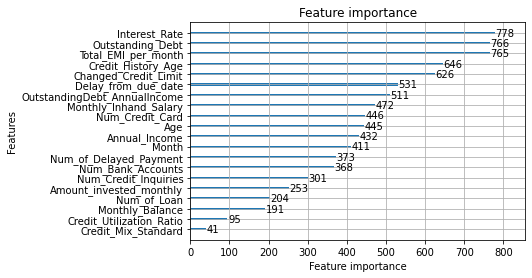

In [101]:
import lightgbm as lgb
# plot feature importance
lgb.plot_importance(model, max_num_features= 20)

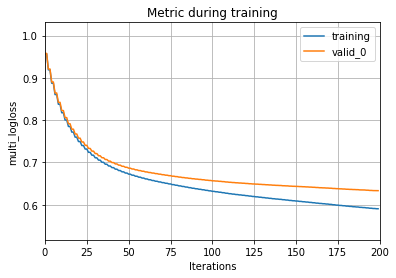

In [51]:
# plot metric during training
lgb.plot_metric(model)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


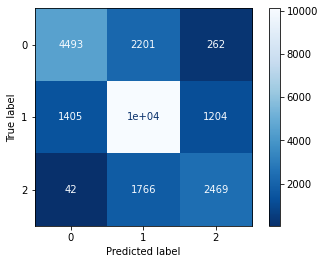

In [54]:
# plot confusion matrix
metrics.plot_confusion_matrix(model,X_test,y_test,cmap='Blues_r')

In [55]:
# print the metrics
print(metrics.classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.76      0.65      0.70      6956
           1       0.72      0.80      0.75     12731
           2       0.63      0.58      0.60      4277

    accuracy                           0.71     23964
   macro avg       0.70      0.67      0.68     23964
weighted avg       0.71      0.71      0.71     23964

